In [233]:
pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [234]:
import pandas as pd
import numpy as np
from sklearn import metrics
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df=pd.read_csv("google_stock_price.csv")
df.head()

In [235]:
series_shifted=df['Close'].shift()
df['prev_close']=series_shifted
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,prev_close,Date_Ordinal,Predicted_Close
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,NaN,731813,-17.103034
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2.697639,731816,-17.053229
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2.724787,731817,-17.036627
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2.611960,731818,-17.020026
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401,2.640104,731819,-17.003424


In [236]:
df.shape

(4841, 10)

In [237]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
prev_close         1
Date_Ordinal       0
Predicted_Close    0
dtype: int64

In [238]:
df.dropna(inplace=True)


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4840 entries, 2 to 4841
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4840 non-null   datetime64[ns]
 1   Open             4840 non-null   float64       
 2   High             4840 non-null   float64       
 3   Low              4840 non-null   float64       
 4   Close            4840 non-null   float64       
 5   Adj Close        4840 non-null   float64       
 6   Volume           4840 non-null   int64         
 7   prev_close       4840 non-null   float64       
 8   Date_Ordinal     4840 non-null   int64         
 9   Predicted_Close  4840 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 415.9 KB


In [240]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,prev_close,Date_Ordinal,Predicted_Close
count,4840,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4.840000e+03,4840.000000,4840.000000,4840.000000
mean,2014-04-01 22:46:12.892562176,41.180377,41.618000,40.761014,41.197400,41.197400,1.190122e+08,41.170259,735324.948760,41.201491
min,2004-08-23 00:00:00,2.470490,2.534002,2.464263,2.490913,2.490913,1.584340e+05,2.490913,731816.000000,-17.053229
25%,2009-06-11 18:00:00,12.835078,12.951331,12.702388,12.829537,12.829537,2.867150e+07,12.828291,733569.750000,12.062105
50%,2014-04-02 12:00:00,26.474565,26.677622,26.268433,26.477904,26.477904,6.193900e+07,26.470153,735325.500000,41.210643
75%,2019-01-23 06:00:00,57.199626,57.743501,56.641376,57.316751,57.316751,1.468524e+08,57.312001,737082.250000,70.375782
max,2023-11-10 00:00:00,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09,150.709000,738834.000000,99.457913
std,NaN,38.267728,38.708128,37.871463,38.295081,38.295081,1.509223e+08,38.275799,2027.540802,33.660743


In [241]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date_Ordinal"] = df["Date"].map(lambda x: x.toordinal())

In [242]:
X = df[["Date_Ordinal"]]
y = df["Close"]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
model = LinearRegression()

# Measure the start time for training
start_train = time.time()

# Train the model
model.fit(X_train, y_train)  # Using X_train and y_train for training

# Measure the end time for training
end_train = time.time()

# Measure the start time for prediction
start_predict = time.time()

# Make predictions for the training set
train_pred = model.predict(X_train)

# Measure the end time for training
end_predict = time.time()

# Calculate Mean Squared Error for the training set
mse_train = mean_squared_error(y_train, train_pred)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_test_pred)
# Calculate Mean Squared Error for the test set

mse_lr = mean_squared_error(y_test, y_test_pred)
print(f"Linear Regression Mean Squared Error on Training Set: {mse_train}")
print(f"Linear Regression Mean Squared Error on Test Set: {mse_lr}")
# Print the time taken for training and prediction
print(f"Time taken for training: {end_train - start_train:.6f} seconds")
print(f"Time taken for prediction: {end_predict - start_predict:.6f} seconds")

#calculating accuracy
variance_train = np.var(y_train)
variance_test = np.var(y_test)
accuracy_train = 1 - (mse_train / variance_train)
accuracy_test = 1 - (mse_lr / variance_test)

# Print the results
print(f"Accuracy on Training Set (from MSE): {accuracy_train * 100:.2f}%")
print(f"Accuracy on Test Set (from MSE): {accuracy_test * 100:.2f}%")


Linear Regression Mean Squared Error on Training Set: 340.3124953024059
Linear Regression Mean Squared Error on Test Set: 303.7117599590432
Time taken for training: 0.006805 seconds
Time taken for prediction: 0.002020 seconds
Accuracy on Training Set (from MSE): 77.05%
Accuracy on Test Set (from MSE): 78.27%


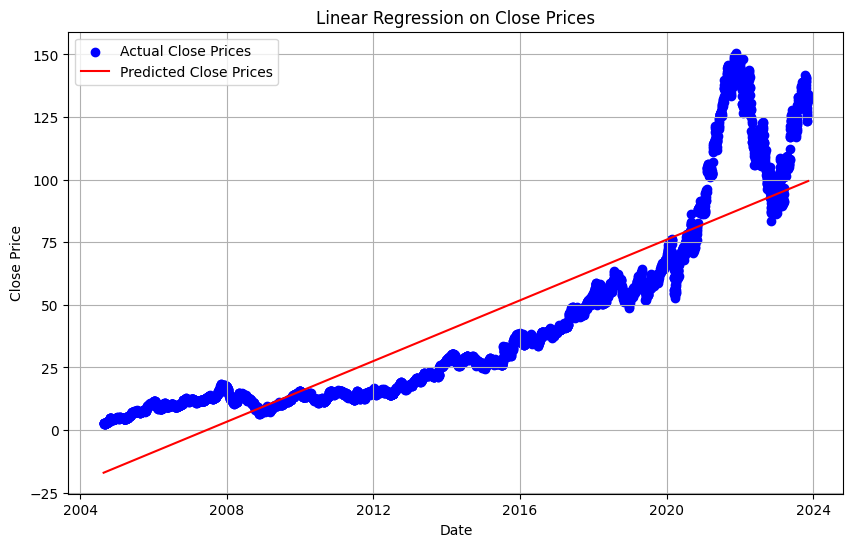

In [245]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Date"], df["Close"], color="blue", label="Actual Close Prices")
plt.plot(df["Date"], df["Predicted_Close"], color="red", label="Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Linear Regression on Close Prices")
plt.legend()
plt.grid(True)
plt.show()

In [246]:
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Slope (m): 0.016735280337484715
Intercept (b): -12264.706783282554


In [247]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

In [248]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [267]:
import time
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variables

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeRegressor(random_state=42, max_depth=2, min_samples_leaf=20,min_impurity_decrease=0.1,max_features=3)

# Measure the start time for training
start_train_tree = time.time()

# Train the model
model.fit(X_train, y_train)

# Measure the end time for training
end_train_tree = time.time()


start_predict_tree = time.time()


y_pred = model.predict(X_test)


end_predict_tree = time.time()


mse_test = mean_squared_error(y_test, y_pred)
y_train_pred = model.predict(X_train)  
mse_train = mean_squared_error(y_train, y_train_pred)


print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"Mean Squared Error on Training Set: {mse_train}")


print(f"Time taken for training the Decision Tree: {end_train_tree - start_train_tree:.6f} seconds")
print(f"Time taken for prediction with the Decision Tree: {end_predict_tree - start_predict_tree:.6f} seconds")


variance_train = np.var(y_train)
variance_test = np.var(y_test)

accuracy_train = 1 - (mse_train / variance_train)
accuracy_test = 1 - (mse_test / variance_test)


print(f"Accuracy on Training Set (from MSE): {accuracy_train * 100:.2f}%")
print(f"Accuracy on Test Set (from MSE): {accuracy_test * 100:.2f}%")


Mean Squared Error on Test Set: 80.32141797379636
Mean Squared Error on Training Set: 77.24220431404036
Time taken for training the Decision Tree: 0.008431 seconds
Time taken for prediction with the Decision Tree: 0.002004 seconds
Accuracy on Training Set (from MSE): 94.79%
Accuracy on Test Set (from MSE): 94.25%


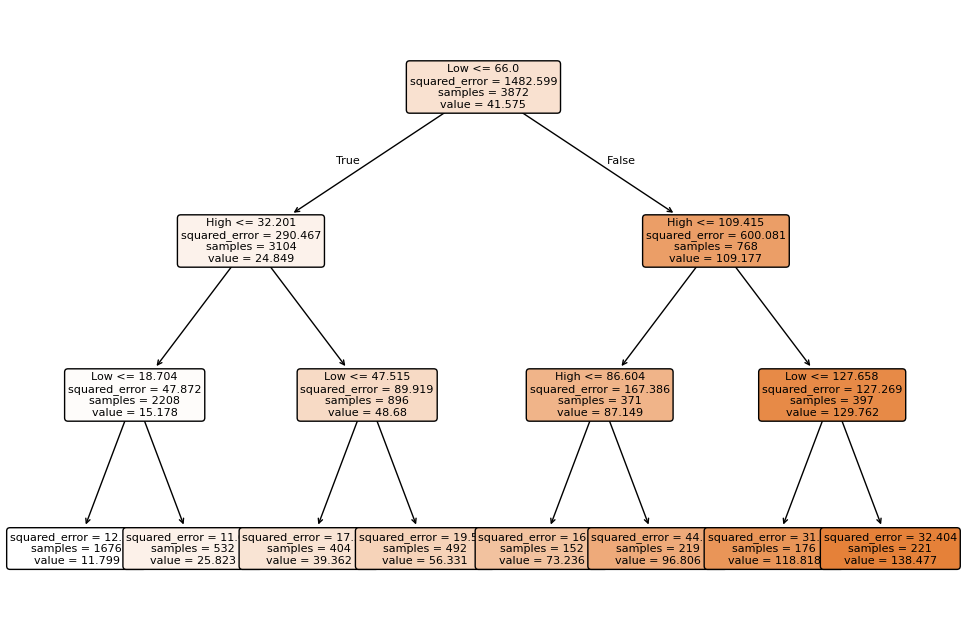

In [250]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()

In [251]:
from sklearn.ensemble import RandomForestRegressor

In [252]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.drop(columns=['Date'])

In [253]:
X = df.drop(columns=['Close'])
y = df['Close']

In [268]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import time


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42,max_depth=2, min_samples_split=15,  min_samples_leaf=10,    n_estimators=50,  max_features=2,  oob_score=False)    
    


start_train_rf = time.time()
model.fit(X_train, y_train)
end_train_rf = time.time()


start_predict_rf = time.time()
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
end_predict_rf = time.time()


mse_train_rf = mean_squared_error(y_train, y_train_pred)
mse_test_rf = mean_squared_error(y_test, y_test_pred)


variance_train_rf = np.var(y_train)
variance_test_rf = np.var(y_test)

accuracy_train_rf = 1 - (mse_train_rf / variance_train_rf)
accuracy_test_rf = 1 - (mse_test_rf / variance_test_rf)


print(f"Random Forest Mean Squared Error on Training Set: {mse_train_rf}")
print(f"Random Forest Mean Squared Error on Test Set: {mse_test_rf}")
print(f"Random Forest Accuracy on Training Set: {accuracy_train_rf * 100:.2f}%")
print(f"Random Forest Accuracy on Test Set: {accuracy_test_rf * 100:.2f}%")


print(f"Time taken for training the Random Forest: {end_train_rf - start_train_rf:.6f} seconds")
print(f"Time taken for prediction with the Random Forest: {end_predict_rf - start_predict_rf:.6f} seconds")


Random Forest Mean Squared Error on Training Set: 65.90172822681417
Random Forest Mean Squared Error on Test Set: 67.72986062882804
Random Forest Accuracy on Training Set: 95.55%
Random Forest Accuracy on Test Set: 95.15%
Time taken for training the Random Forest: 0.159748 seconds
Time taken for prediction with the Random Forest: 0.012321 seconds


In [269]:
# Check that the model is trained
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)  # Make sure this step has been done

# Check if X is a DataFrame
if not isinstance(X, pd.DataFrame):
    raise ValueError("X must be a pandas DataFrame to access column names.")




In [270]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
Open               3.311492e-03
High               7.279440e-02
Low                3.811971e-02
Adj Close          8.844423e-01
Volume             7.104498e-07
prev_close         7.806048e-04
Date_Ordinal       3.611520e-04
Predicted_Close    1.896800e-04
dtype: float64


In [271]:
import seaborn as sns

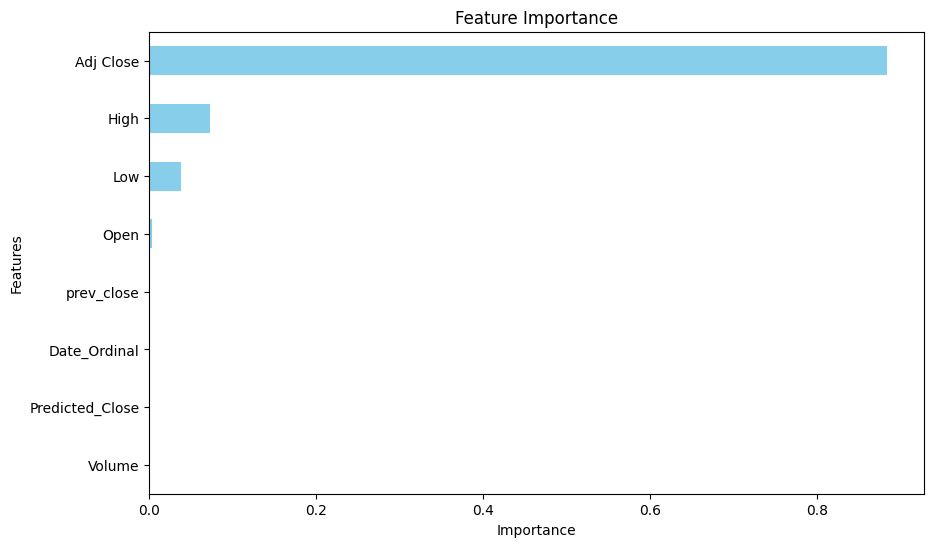

In [272]:
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

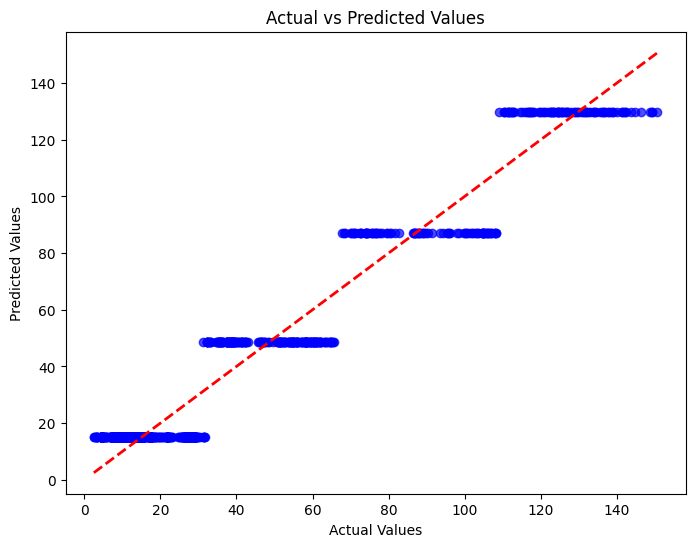

In [273]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

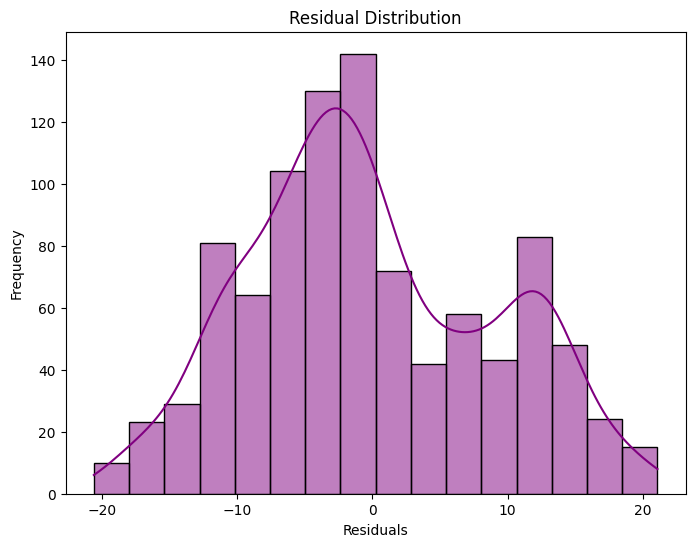

In [274]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()